In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
ds = pd.read_csv("Tweets.csv")

In [83]:
ds.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [84]:
# Data Cleaning
# EDA
# Text preprocessing
# Model Building
# Model Evaluate

## Data Cleaning

In [85]:
col = ['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord']
ds = ds.drop(col,axis=1)

In [86]:
def fill_null(ds):
  if pd.isnull(ds['negativereason']):
    if ds['airline_sentiment']=='positive':
      return 'positive feedback'
    elif ds['airline_sentiment']=='neutral':
      return 'neutral feedback'
    else:
      return 'other'
  else:
    return ds['negativereason']

In [87]:
ds['negativereason'] = ds.apply(fill_null,axis=1)

In [88]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,neutral feedback,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,neutral feedback,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [89]:
ds['negativereason_confidence'] = ds['negativereason_confidence'].fillna(0)

In [90]:
ds['tweet_location']

,tweet_location
0,NaN
1,NaN
2,Lets Play
3,NaN
4,NaN
...,...
14635,NaN
14636,Texas
14637,"Nigeria,lagos"
14638,New Jersey


In [91]:
ds = ds.drop(columns='tweet_location',axis=1)

In [92]:
ds = ds.drop(columns='user_timezone',axis=1)

In [93]:
ds.isnull().sum()

,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,0
negativereason_confidence,0
airline,0
name,0
retweet_count,0
text,0
tweet_created,0


## EDA

In [94]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


<Axes: xlabel='airline_sentiment', ylabel='count'>

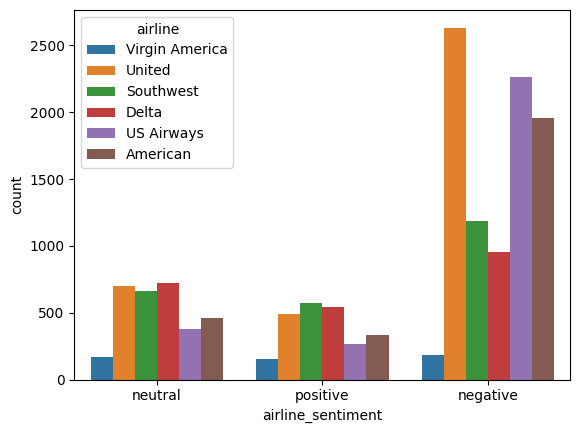

In [95]:
sns.countplot(x='airline_sentiment',hue='airline',data=ds)

In [96]:
ds['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


<Axes: xlabel='airline_sentiment', ylabel='count'>

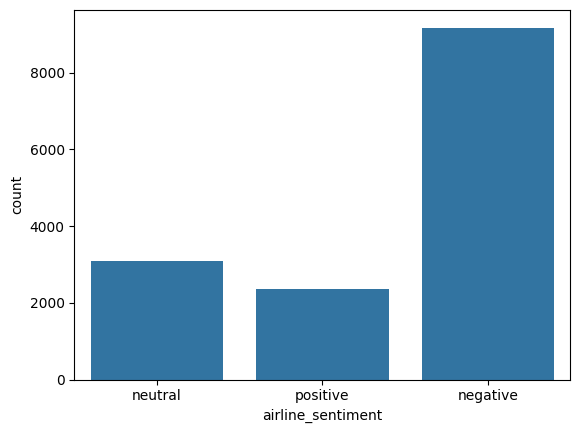

In [97]:
# airline sentiment distribution
sns.countplot(x='airline_sentiment',data=ds)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le = LabelEncoder()
ds['airline_sentiment'] = le.fit_transform(ds['airline_sentiment'])

In [100]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [101]:
from nltk import word_tokenize,sent_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [102]:
ds['number_character'] = ds['text'].apply(len)

In [103]:
ds['number_word'] = ds['text'].apply(lambda x:len(word_tokenize(x)))

In [104]:
ds['number_sentence'] = ds['text'].apply(lambda x:len(sent_tokenize(x)))

In [105]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,number_character,number_word,number_sentence
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1


In [106]:
ds[ds['airline_sentiment']==0].describe()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,number_character,number_word,number_sentence
count,9178.0,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000
mean,0.0,0.933365,0.731769,0.093375,113.947919,24.125953,2.094138
std,0.0,0.138109,0.238276,0.792865,30.719006,6.817604,0.979059
min,0.0,0.339400,0.312200,0.000000,12.000000,3.000000,1.000000
25%,0.0,1.000000,0.645300,0.000000,96.000000,20.000000,1.000000
50%,0.0,1.000000,0.680600,0.000000,126.000000,26.000000,2.000000
75%,0.0,1.000000,1.000000,0.000000,138.000000,29.000000,3.000000
max,0.0,1.000000,1.000000,44.000000,176.000000,46.000000,9.000000


In [107]:
ds[ds['airline_sentiment']==2].describe()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,number_character,number_word,number_sentence
count,2363.0,2363.000000,2363.0,2363.000000,2363.000000,2363.000000,2363.000000
mean,2.0,0.872039,0.0,0.069403,86.082945,18.293271,2.069826
std,0.0,0.179478,0.0,0.659914,39.482103,8.289220,0.969361
min,2.0,0.335600,0.0,0.000000,12.000000,3.000000,1.000000
25%,2.0,0.677500,0.0,0.000000,52.000000,11.500000,1.000000
50%,2.0,1.000000,0.0,0.000000,86.000000,18.000000,2.000000
75%,2.0,1.000000,0.0,0.000000,124.000000,25.000000,3.000000
max,2.0,1.000000,0.0,22.000000,186.000000,47.000000,9.000000


In [108]:
ds[ds['airline_sentiment']==1].describe()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,number_character,number_word,number_sentence
count,3099.0,3099.000000,3099.0,3099.000000,3099.000000,3099.000000,3099.000000
mean,1.0,0.823303,0.0,0.060987,87.359471,18.427557,1.701194
std,0.0,0.185594,0.0,0.658037,37.682903,8.000655,0.846385
min,1.0,0.335000,0.0,0.000000,12.000000,3.000000,1.000000
25%,1.0,0.666050,0.0,0.000000,57.000000,12.000000,1.000000
50%,1.0,0.916000,0.0,0.000000,87.000000,18.000000,1.000000
75%,1.0,1.000000,0.0,0.000000,123.000000,25.000000,2.000000
max,1.0,1.000000,0.0,28.000000,167.000000,41.000000,6.000000


In [109]:
ds[ds['airline_sentiment']==0]['negativereason'].value_counts()

,count
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


## Text preprocessing

In [110]:
# Lower case
# tokenize
# Stop words and punctuation removal
# special character
# Stemming

In [111]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
from tkinter.constants import Y
def text_transform(text):
  text = text.lower()
  text = word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(lemmatizer.lemmatize(i))

  return " ".join(y)

In [114]:
ds['transformed_text'] = ds['text'].apply(text_transform)

In [115]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,number_character,number_word,number_sentence,transformed_text
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,virginamerica dhepburn said
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,virginamerica plus added commercial experience...
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,virginamerica today must mean need take anothe...
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,virginamerica really aggressive blast obnoxiou...
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,virginamerica really big bad thing


In [116]:
from wordcloud import WordCloud

In [117]:
wc = WordCloud(width=600,height=500,min_font_size=10,background_color='white')

In [118]:
negative_wc = wc.generate(ds[ds['airline_sentiment']==0]['transformed_text'].str.cat(sep=" "))

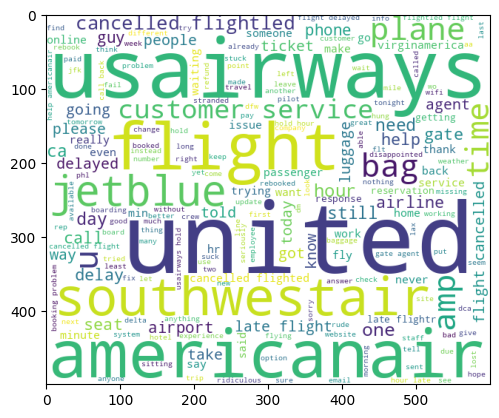

In [119]:
plt.imshow(negative_wc)

In [120]:
posistive_wc = wc.generate(ds[ds['airline_sentiment']==2]['transformed_text'].str.cat(sep=" "))

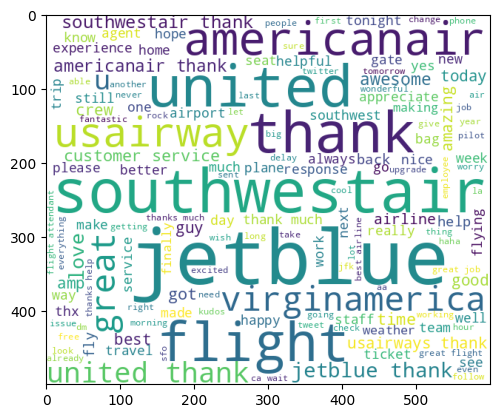

In [121]:
plt.imshow(posistive_wc)

In [122]:
neutral_wc = wc.generate(ds[ds['airline_sentiment']==1]['transformed_text'].str.cat(sep=" "))

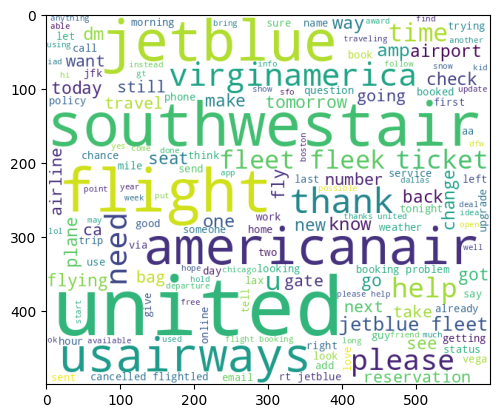

In [123]:
plt.imshow(neutral_wc)

## Model Building

In [124]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,number_character,number_word,number_sentence,transformed_text
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,virginamerica dhepburn said
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,virginamerica plus added commercial experience...
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,virginamerica today must mean need take anothe...
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,virginamerica really aggressive blast obnoxiou...
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,virginamerica really big bad thing


In [125]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [126]:
tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(ds['transformed_text']).toarray()

In [127]:
# Splitting data
y = ds['airline_sentiment']

In [128]:
X.shape

(14640, 3000)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
X_test.shape

(2928, 3000)

In [132]:
X_train.shape

(11712, 3000)

In [133]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

**We will use "classification_report" for checking correct accuracy because here the output are not binary it is multiclass classifier**

> Add blockquote



In [134]:
#gnb = GaussianNB()
#mnb = MultinomialNB()
#bnb = BernoulliNB()

In [135]:
#gnb.fit(X_train,y_train)
#pred1 = gnb.predict(X_test)
#print(accuracy_score(y_test,pred1))
#print(confusion_matrix(y_test,pred1))
#print(classification_report(y_test,pred1))

In [136]:
#mnb.fit(X_train,y_train)
#pred2 = gnb.predict(X_test)
#print(accuracy_score(y_test,pred2))
#print(confusion_matrix(y_test,pred2))
#print(classification_report(y_test,pred2))

In [137]:
#bnb.fit(X_train,y_train)
#pred3 = gnb.predict(X_test)
#print(accuracy_score(y_test,pred3))
#print(confusion_matrix(y_test,pred3))
#print(classification_report(y_test,pred3))

In [138]:
#from sklearn.linear_model import LogisticRegression

In [139]:
#lr = LogisticRegression(class_weight='balanced',multi_class='multinomial')

In [140]:
#lr.fit(X_train,y_train)
#pred4 = gnb.predict(X_test)
#print(accuracy_score(y_test,pred4))
#print(confusion_matrix(y_test,pred4))
#print(classification_report(y_test,pred4))

In [141]:
#sns.heatmap(confusion_matrix(y_test, pred4), annot=True, fmt='d', cmap='Blues')
#plt.show()

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
pred5 = rfc.predict(X_test)
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

0.7503415300546448
[[1684   77   30]
 [ 316  270   62]
 [ 163   83  243]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1791
           1       0.63      0.42      0.50       648
           2       0.73      0.50      0.59       489

    accuracy                           0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.75      0.73      2928



In [145]:
comment = ["It was very bad flight. I don't like the service. The crew member was very not friendly"]
cmnt_vectorizer = tf.transform(comment)

pred_num = rfc.predict(cmnt_vectorizer)[0]
pred_label = le.inverse_transform([pred_num])[0]

print("Predicted Sentiment:", pred_label)

Predicted Sentiment: negative


In [146]:
print(pred_num)

0


In [147]:
import joblib

In [148]:
joblib.dump(rfc,"sentiment_model.pkl")
joblib.dump(tf,"vectorizer.pkl")

['vectorizer.pkl']